In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

## define A, b
システムA, bを決定する

In [2]:
m = 5
n = 10

In [3]:
A = np.random.randint(low=0, high=4, size=(m, n))
b = np.random.randint(low=1, high=11, size=(m, ))

A, b

(array([[0, 0, 1, 1, 2, 3, 1, 1, 3, 2],
        [3, 0, 3, 0, 2, 0, 1, 1, 0, 0],
        [0, 2, 0, 3, 1, 3, 3, 0, 1, 2],
        [1, 0, 3, 3, 2, 0, 3, 2, 3, 0],
        [0, 2, 1, 1, 3, 2, 0, 3, 0, 1]]),
 array([2, 9, 2, 6, 8]))

## define b

In [4]:
w_init = np.random.random(size=(n, ))
w_init

array([0.14650678, 0.34166816, 0.01650403, 0.2936042 , 0.9699479 ,
       0.14885707, 0.75007688, 0.79204504, 0.54730006, 0.97308613])

In [5]:
def f(A_, b_, w_, lam_):
    return LA.norm((b_ - A_@w_), ord=2) + lam_ * LA.norm(w_, ord=2)


In [6]:
def SteepestDescent(A, b, w, lam, iter=101): 
    # Hesse行列、最大固有値の計算
    Hesse = A.T@A + lam * np.identity(n)
    u, v = LA.eig(Hesse)
    L = abs(u).max()
    print(L)

    f_step = np.zeros(iter)
    
    for k in range(iter):
        # df/dw
        f = LA.norm((b - A@w), ord=2) + lam * LA.norm(w, ord=2)
        f_step[k] = f
        dfdw = A.T@A@w - A.T@b + lam*w
        w = w - (1/L) * dfdw
        
    return f_step

In [7]:
def Nesterov(A, b, w, lam, iter=101): 
    Hesse = A.T@A + lam * np.identity(n)
    u, v = LA.eig(Hesse)
    L = abs(u).max()
    
    eta = 1/L
    
    rho_prev = 0
    rho = 0
    w_bar = w
    w_prev = w
    f_step = np.zeros(iter)
    
    for k in range(iter):
        # df/dw
        f = LA.norm((b - A@w), ord=2) + lam * LA.norm(w, ord=2)
        f_step[k] = f
        
        rho = (1 + np.sqrt(1+4*rho**2)) / 2
        gamma = (rho_prev - 1) / rho
        rho_prev = rho
        
        w_bar = w + gamma * (w-w_prev)
        w_prev = w
        
        dfdw = A.T@A@w_bar - A.T@b + lam*w_bar
        w = w_bar - eta*dfdw
        
    return f_step

111.39126908691959


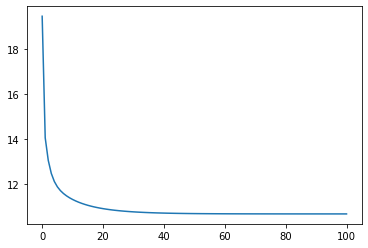

In [8]:
lam = 5
w = np.copy(w_init)
fstep_lam5 = SteepestDescent(A, b, w, lam)
plt.plot(fstep_lam5)

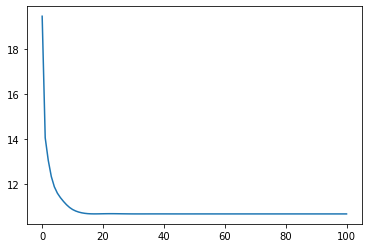

In [9]:
lam = 5
w = np.copy(w_init)
nesterov_lam5 = Nesterov(A, b, w, lam)
plt.plot(nesterov_lam5)

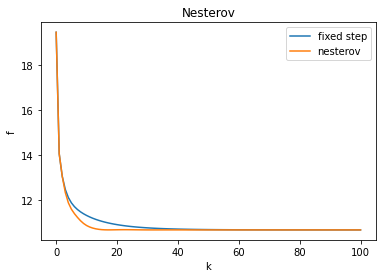

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('k')
ax.set_ylabel('f')
ax.set_title(r'Nesterov')

ax.plot(fstep_lam5, label='fixed step')
ax.plot(nesterov_lam5, label='nesterov')
ax.legend()
plt.savefig('SG_nesterov.png')
plt.show()